In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt 
import time

In [2]:
def canny_mask(original,canny):
    new_image=original
    shapeless_color_array = np.empty(0)
    image_width = original.shape[1]
    left_edge=image_width//2
    right_edge=image_width//2
    for i,row in enumerate(original):
        if np.max(canny[i])>0:
            if np.argmax(edges[i])<image_width//2:
                left_edge = np.argmax(edges[i])
            if new_image.shape[1]-np.argmax(np.flip(edges[i],0))> image_width//2:
                right_edge = new_image.shape[1]-np.argmax(np.flip(edges[i],0))
        left=np.zeros((left_edge,3))
        middle=np.ones((right_edge-left_edge,3))
        right=np.zeros((image_width-right_edge,3))
        row = np.append(left,middle)
        row=np.append(row,right)
        
        row=row.reshape(original[i].shape)
        new_image[i]*=row.astype(np.uint8)
        
        #get the shapeless color array for processing
        #this is just a string of every pixel to be included
        body_only=new_image[i][left_edge:right_edge]
        shapeless_color_array=np.append(shapeless_color_array,body_only)
    
    return new_image,shapeless_color_array.astype(np.uint8)

## Our goal is to make a bunch of images like below, where we detect the edges and reject everything outside the edges.


(<matplotlib.axes._subplots.AxesSubplot at 0x11ba1f630>,
 <matplotlib.image.AxesImage at 0x11ba9aa20>)

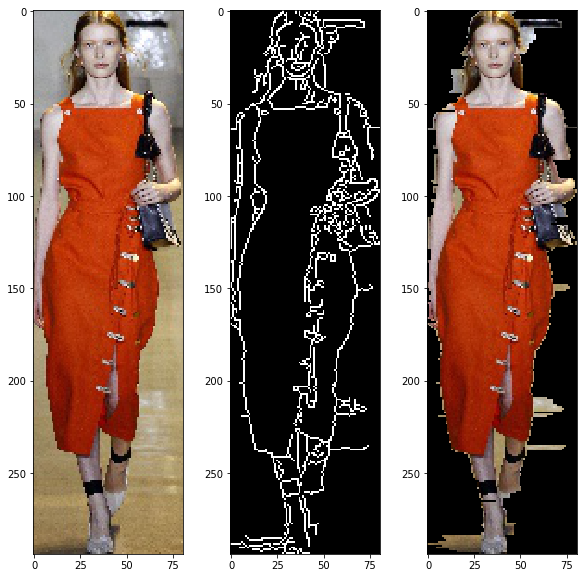

In [3]:
image='./tensor_flow_detected_models/Altuzarra_Spring 2016 Ready-to-Wear_Look 25_detected.jpg'

img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,50,500)
img = cv2.imread(image,cv2.IMREAD_COLOR)
b,g,r = cv2.split(img)       # get b,g,r
img = cv2.merge([r,g,b])         # convert to RGB
plt.figure(figsize=(10,10))
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.subplot(133),plt.imshow(canny_mask(img,edges)[0])

# I will create a shapeless color array which is basically a list of all the pixels from that image inside the bounding box. 

In [4]:
directory=pd.read_csv('./tensor_flow_detected_models/directory.csv')
new_directory=pd.DataFrame(columns=['canny_image_path','pixel_list'])

In [6]:
start=time.time()

for i,image in enumerate(directory.detected_image_filepath):
    #get the canny filter
    if i==3795:continue
    img = cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(img,50,500)
    
    #process the image
    img = cv2.imread(image,cv2.IMREAD_COLOR)
    filtered_image,pixel_list=canny_mask(img,edges)
    
    #save the processed image
    canny_image_path='./Canny_Filtered_Images/'+image[30:]+"canny.jpg"
    cv2.imwrite(canny_image_path,filtered_image)
    pixel_list=pixel_list.reshape((pixel_list.shape[0]//3,3))
    filtered_image_info={
                        'canny_image_path':canny_image_path,
                        'pixel_list':pixel_list}
    new_directory=new_directory.append(filtered_image_info,ignore_index=True)
new_directory.to_pickle('./Canny_Filtered_Images/directory.pkl')
    
end=time.time()

print('the process took '+str(end-start)+'seconds for '+ str(len(directory.detected_image_filepath)))
    

the process took 484.68998312950134seconds for 14541


In [ ]:
new_directory.to_pickle('./Canny_Filtered_Images/directory.pkl')

In [ ]:
directory.head()

In [ ]:
display(directory.iloc[3795]['detected_image_filepath'])

In [ ]:
new_directory.shape

In [ ]:
0.018486976623535156*15000

In [ ]:
print(i)